C:\Users\waste\AppData\Local\Temp\ipykernel_15100\1374838322.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("SOFI", start="2020-01-01", end="2025-06-30", progress=False)


Price       Close     diff1 log_return     diff2 ma_diff slope_5d
Ticker       SOFI                                                
Date                                                             
2025-06-23  15.36  0.160000   0.010471  0.320000   0.254    0.169
2025-06-24  15.85  0.490001   0.031403  0.330001   0.190    0.284
2025-06-25  16.08  0.230000   0.014407 -0.260001   0.330    0.209
2025-06-26  16.77  0.690001   0.042015  0.460001   0.282    0.386
2025-06-27  17.18  0.410000   0.024154 -0.280001   0.396    0.456


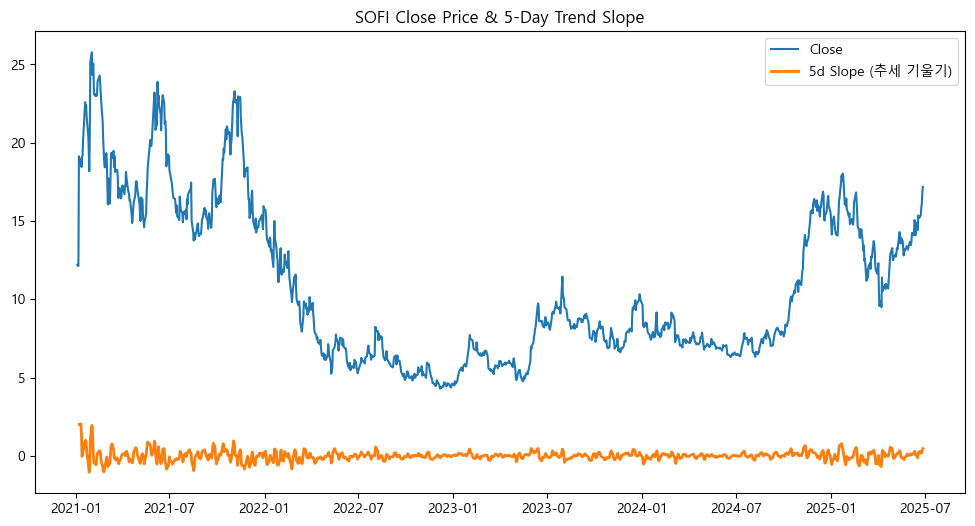

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 시스템에 설치된 한글 폰트 경로 설정 (예: 맑은 고딕)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name

# 1) 데이터 불러오기
#    기간은 필요에 따라 조정하세요.
df = yf.download("SOFI", start="2020-01-01", end="2025-06-30", progress=False)

# 2) 1차 차분: 일일 가격 변화
df['diff1'] = df['Close'].diff()

# 3) 로그 수익률: 스케일 독립적 변동률
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))

# 4) 2차 차분: 변화 가속도
df['diff2'] = df['diff1'].diff()

# 5) n일 이동평균 차분
window = 5  # 5일 이동평균 예제
df['ma']       = df['Close'].rolling(window).mean()
df['ma_diff']  = df['ma'].diff()

# 6) n일 국소 회귀 기울기(추세선 기울기)
def rolling_slope(x):
    # x: rolling window 내의 종가 배열
    idx = np.arange(len(x))
    return linregress(idx, x).slope

df['slope_5d'] = df['Close'].rolling(window).apply(rolling_slope, raw=True)

# 7) 결과 확인
print(df[['Close','diff1','log_return','diff2','ma_diff','slope_5d']].tail())

# 8) 시각화 예시
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['slope_5d'], label='5d Slope (추세 기울기)', linewidth=2)
plt.legend()
plt.title("SOFI Close Price & 5-Day Trend Slope")
plt.show()


C:\Users\waste\AppData\Local\Temp\ipykernel_15100\500375744.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("SOFI", start="2020-01-01", end="2025-06-30", progress=False)


Price       Close     diff1 log_return     diff2 ma_diff slope_5d   bb_upper  \
Ticker       SOFI                                                              
Date                                                                           
2025-06-23  15.36  0.160000   0.010471  0.320000   0.254    0.169  15.685910   
2025-06-24  15.85  0.490001   0.031403  0.330001   0.190    0.284  15.919672   
2025-06-25  16.08  0.230000   0.014407 -0.260001   0.330    0.209  16.184018   
2025-06-26  16.77  0.690001   0.042015  0.460001   0.282    0.386  16.568390   
2025-06-27  17.18  0.410000   0.024154 -0.280001   0.396    0.456  16.968003   

Price        bb_mid   bb_lower        rsi      macd macd_signal  
Ticker                                                           
Date                                                             
2025-06-23  14.1380  12.590090  65.116283  0.549871    0.460275  
2025-06-24  14.2760  12.632328  68.039550  0.603193    0.488859  
2025-06-25  14.4105  12.63698

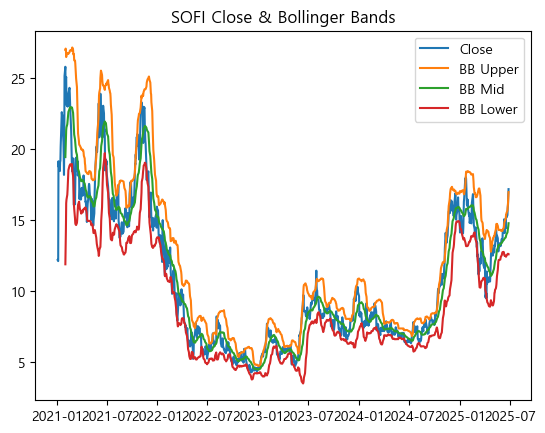

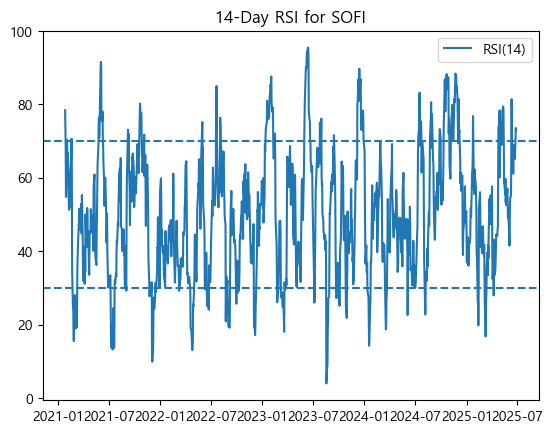

c:\Git\Python\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


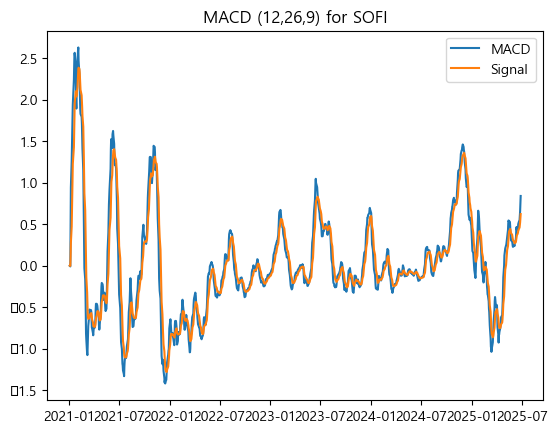

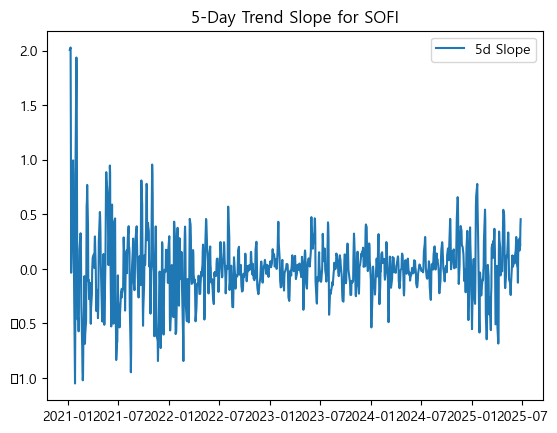

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# 1) 데이터 불러오기
df = yf.download("SOFI", start="2020-01-01", end="2025-06-30", progress=False)

# 2) 기본 미분 지표
df['diff1']     = df['Close'].diff()                     # 1차 차분
df['log_return']= np.log(df['Close'] / df['Close'].shift(1))  # 로그 수익률
df['diff2']     = df['diff1'].diff()                     # 2차 차분

# 3) 이동평균과 5일 회귀 기울기
window = 5
df['ma']        = df['Close'].rolling(window).mean()
df['ma_diff']   = df['ma'].diff()

def rolling_slope(x):
    idx = np.arange(len(x))
    return linregress(idx, x).slope

df['slope_5d']  = df['Close'].rolling(window).apply(rolling_slope, raw=True)

# 4) Bollinger Bands (20일)
bb_w = 20
df['bb_mid']   = df['Close'].rolling(bb_w).mean()
df['bb_std']   = df['Close'].rolling(bb_w).std()
df['bb_upper'] = df['bb_mid'] + 2 * df['bb_std']
df['bb_lower'] = df['bb_mid'] - 2 * df['bb_std']

# 5) RSI (14일)
delta = df['Close'].diff()
gain  = delta.clip(lower=0)
loss  = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df['rsi'] = 100 - (100 / (1 + rs))

# 6) MACD (12,26,9)
ema12 = df['Close'].ewm(span=12, adjust=False).mean()
ema26 = df['Close'].ewm(span=26, adjust=False).mean()
df['macd']         = ema12 - ema26
df['macd_signal']  = df['macd'].ewm(span=9, adjust=False).mean()

# 7) 최근 결과 확인
print(df[['Close','diff1','log_return','diff2','ma_diff','slope_5d',
          'bb_upper','bb_mid','bb_lower','rsi','macd','macd_signal']].tail())

# 8) 플롯
# (1) 가격 & Bollinger Bands
plt.figure()
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['bb_upper'], label='BB Upper')
plt.plot(df.index, df['bb_mid'],   label='BB Mid')
plt.plot(df.index, df['bb_lower'], label='BB Lower')
plt.legend()
plt.title("SOFI Close & Bollinger Bands")
plt.show()

# (2) RSI
plt.figure()
plt.plot(df.index, df['rsi'], label='RSI(14)')
plt.axhline(70, linestyle='--')
plt.axhline(30, linestyle='--')
plt.legend()
plt.title("14-Day RSI for SOFI")
plt.show()

# (3) MACD
plt.figure()
plt.plot(df.index, df['macd'],        label='MACD')
plt.plot(df.index, df['macd_signal'], label='Signal')
plt.legend()
plt.title("MACD (12,26,9) for SOFI")
plt.show()

# (4) 5일 추세 기울기
plt.figure()
plt.plot(df.index, df['slope_5d'], label='5d Slope')
plt.legend()
plt.title("5-Day Trend Slope for SOFI")
plt.show()


In [1]:
# ─────────────────────────────────────────────
# ✨ Coca-Cola( KO ) 미분 분석 올-인-원 스크립트
# ─────────────────────────────────────────────
# ① 필요 패키지 설치
#    처음 한 번만 실행: pip install yfinance pandas numpy openpyxl

import yfinance as yf
import pandas as pd
import numpy as np

# ─────────────────────────────────────────────
def analyze_stock_derivatives(symbol='KO', period='2y'):
    """주가 다운로드→미분 분석→매매신호 생성 후 DataFrame 반환"""
    # 1) 데이터 다운로드
    df = yf.Ticker(symbol).history(period=period)
    if df.empty:
        raise ValueError(f'{symbol} 데이터가 없습니다.')
    df = df.reset_index()
    df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)   # 엑셀 호환

    # 2) 1차·2차 미분(일일 수익률·가속도)
    df['Daily_Return_pct'] = (df['Close'].pct_change()*100)
    df['Acceleration']     = df['Daily_Return_pct'].diff()

    # 3) 이동평균선·기울기
    for w in (5, 20, 50):
        ma = f'MA_{w}'
        df[ma] = df['Close'].rolling(w).mean()
        # 선형회귀 기울기(최근 w일)
        df[f'{ma}Slope'] = (df[ma]
                            .rolling(w)
                            .apply(lambda y: np.polyfit(range(w), y, 1)[0],
                                   raw=False))

    # 4) 변동성(20일 표준편차)
    df['Volatility_20'] = df['Daily_Return_pct'].rolling(20).std()

    # 5) 매매 신호 로직
    def signal(row):
        if pd.isna(row['MA_5Slope']) or pd.isna(row['MA_20Slope']):
            return 'Hold'
        up   = row['MA_5Slope'] > 0 and row['MA_20Slope'] > 0
        down = row['MA_5Slope'] < 0 and row['MA_20Slope'] < 0
        if up   and row['Acceleration']>0: return 'Strong Buy'
        if up:   return 'Buy'
        if down and row['Acceleration']<0: return 'Strong Sell'
        if down: return 'Sell'
        return 'Hold'
    df['Signal'] = df.apply(signal, axis=1)

    return df

# ─────────────────────────────────────────────
def export_to_excel(df, filename='coca_cola_analysis.xlsx'):
    """분석 결과를 시트별로 저장"""
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        df.to_excel(writer, sheet_name='전체_데이터', index=False)
        df.tail(30).to_excel(writer, sheet_name='최근_30일', index=False)
        df[df['Signal'].isin(['Buy','Strong Buy'])].to_excel(writer,
                                    sheet_name='매수_신호', index=False)
        df[df['Signal'].isin(['Sell','Strong Sell'])].to_excel(writer,
                                    sheet_name='매도_신호', index=False)
        # 핵심 지표 요약
        summary = {
            '지표': ['현재가','30일수익률(%)','20일 변동성(%)',
                    'MA5 기울기','MA20 기울기','MA50 기울기'],
            '값' : [df['Close'].iloc[-1],
                    (df['Close'].iloc[-1]-df['Close'].iloc[-30])
                    /df['Close'].iloc[-30]*100,
                    df['Volatility_20'].iloc[-1],
                    df['MA_5Slope'].iloc[-1],
                    df['MA_20Slope'].iloc[-1],
                    df['MA_50Slope'].iloc[-1]]
        }
        pd.DataFrame(summary).to_excel(writer, sheet_name='요약_통계', index=False)
    print(f'✅ 엑셀 저장 완료: {filename}')

# ─────────────────────────────────────────────
if __name__ == '__main__':
    df = analyze_stock_derivatives('KO', '2y')     # 2년치 코카콜라 분석
    print(df.tail(10)[['Date','Close','Daily_Return_pct',
                       'MA_5Slope','MA_20Slope',
                       'Acceleration','Signal']])
    export_to_excel(df)
# ─────────────────────────────────────────────


          Date      Close  Daily_Return_pct  MA_5Slope  MA_20Slope  \
492 2025-06-13  71.019997         -0.989822   0.175151   -0.001132   
493 2025-06-16  70.519997         -0.704027   0.087728    0.006589   
494 2025-06-17  69.620003         -1.276225  -0.070121    0.012375   
495 2025-06-18  69.209999         -0.588916  -0.264851    0.015101   
496 2025-06-20  68.839996         -0.534609  -0.419557    0.014969   
497 2025-06-23  69.739998          1.307382  -0.454440    0.013260   
498 2025-06-24  70.209999          0.673934  -0.356648    0.010800   
499 2025-06-25  69.629997         -0.826096  -0.210600    0.007337   
500 2025-06-26  69.470001         -0.229780  -0.058800    0.002394   
501 2025-06-27  70.330002          1.237945   0.063400   -0.003546   

     Acceleration      Signal  
492     -1.225704        Hold  
493      0.285795  Strong Buy  
494     -0.572198        Hold  
495      0.687309        Hold  
496      0.054308        Hold  
497      1.841991        Hold  
498  